# Note: Not updated with msl1114 dataset results

## Results of Host Prediction
### Dataset: All viruses, all proteins, without duplicates, without humans

**Model**: Transformer w/o convolution

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1024

**Classification**: Multi-class

**\# classes**: 8

**\# train samples** = 2815

**\# test samples** = 704

In [49]:
output_filepath = os.path.join(os.getcwd(), "..","..", "output\\raw\\uniref90\\20230604\\host_multi-withouthumans\\tf-emb_sincos-msl_1024-d_512_transformer-crossentropy_output.csv")

In [50]:
df = pd.read_csv(output_filepath, index_col=0)

In [51]:
print(df.shape)
df.head()

(3520, 10)


,Cattle,Desert warthog,Goat,Horse,Lesser bandicoot rat,Others,Red junglefowl,Wood mouse,y_true,itr
0,0.007181,0.990439,0.000268,0.000033,0.000029,0.000060,0.001248,0.000742,Desert warthog,0
1,0.129177,0.176522,0.011334,0.000955,0.000040,0.000375,0.005552,0.676045,Wood mouse,0
2,0.001560,0.001096,0.977629,0.005416,0.000089,0.000141,0.013831,0.000238,Goat,0
3,0.081426,0.897887,0.002229,0.000543,0.000048,0.000242,0.007622,0.010003,Desert warthog,0
4,0.571605,0.049536,0.014142,0.228158,0.001631,0.005146,0.107265,0.022516,Red junglefowl,0


In [52]:
cols = df.columns
non_human_cols = list(set(cols) - set([itr_col, experiment_col, y_true_col]))

In [53]:
non_human_cols

['Cattle',
 'Goat',
 'Lesser bandicoot rat',
 'Desert warthog',
 'Wood mouse',
 'Horse',
 'Red junglefowl',
 'Others']

In [54]:
itrs = df[itr_col].unique()
itrs

array([0, 1, 2, 3, 4], dtype=int64)

In [55]:
result = []
pr_curves = []
for itr in itrs:
    df_itr = df[df[itr_col] == itr]
    pr_curves_df, auprcs_df = compute_auprc(df_itr, y_pred_columns=non_human_cols , y_true_col=y_true_col)
    pr_curves_df[itr_col] = itr
    auprcs_df[itr_col] = itr
    result.append(auprcs_df)
    pr_curves.append(pr_curves_df)

result_df = pd.concat(result, ignore_index=True)
pr_curves_df = pd.concat(pr_curves, ignore_index=True)
        
        

C:\Users\bless\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\bless\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\bless\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\bless\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\bless\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [56]:
result_df.head(30)

,class,auprc,itr
0,Cattle,0.385630,0
1,Goat,0.884101,0
2,Lesser bandicoot rat,0.994994,0
3,Desert warthog,0.932764,0
4,Wood mouse,0.777562,0
5,Horse,0.928761,0
6,Red junglefowl,0.844625,0
7,Others,NaN,0
8,Cattle,0.421845,1
9,Goat,0.856432,1


In [57]:
pr_curves_df.head()

,precision,recall,class,itr
0,0.106742,1.000000,Cattle,0
1,0.104225,0.973684,Cattle,0
2,0.104520,0.973684,Cattle,0
3,0.104816,0.973684,Cattle,0
4,0.105114,0.973684,Cattle,0


In [58]:
metadata = compute_class_distribution(df_itr, y_true_col, format=True)
metadata

{'Desert warthog': 'Desert warthog (29.69%)',
 'Lesser bandicoot rat': 'Lesser bandicoot rat (22.73%)',
 'Horse': 'Horse (12.50%)',
 'Goat': 'Goat (12.07%)',
 'Red junglefowl': 'Red junglefowl (9.52%)',
 'Wood mouse': 'Wood mouse (8.10%)',
 'Cattle': 'Cattle (5.40%)'}

#### AUPRC for each class

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Desert warthog (29.69%)'),
  Text(1, 0, 'Lesser bandicoot rat (22.73%)'),
  Text(2, 0, 'Horse (12.50%)'),
  Text(3, 0, 'Goat (12.07%)'),
  Text(4, 0, 'Red junglefowl (9.52%)'),
  Text(5, 0, 'Wood mouse (8.10%)'),
  Text(6, 0, 'Cattle (5.40%)')])

<Figure size 432x288 with 0 Axes>

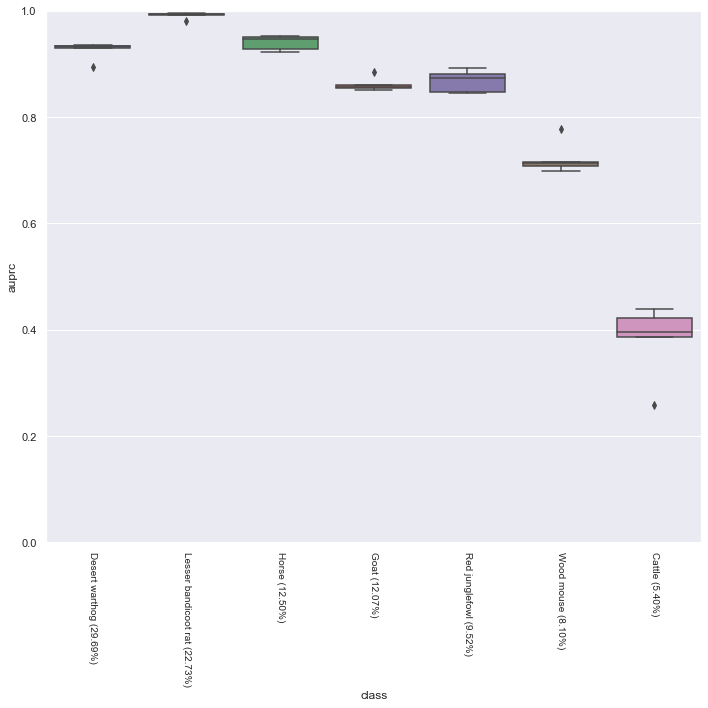

In [61]:
plt.clf()
sns.set_theme()

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['figure.autolayout'] = True
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=result_df, x="class", y="auprc", order=metadata.keys())
ax.set_ylim(0, 1)
ax.set_xticklabels([metadata[t.get_text()] for t in ax.get_xticklabels()])
plt.tight_layout()
plt.xticks(rotation=-90)


#### Precision Recall Curves

<Figure size 432x288 with 0 Axes>

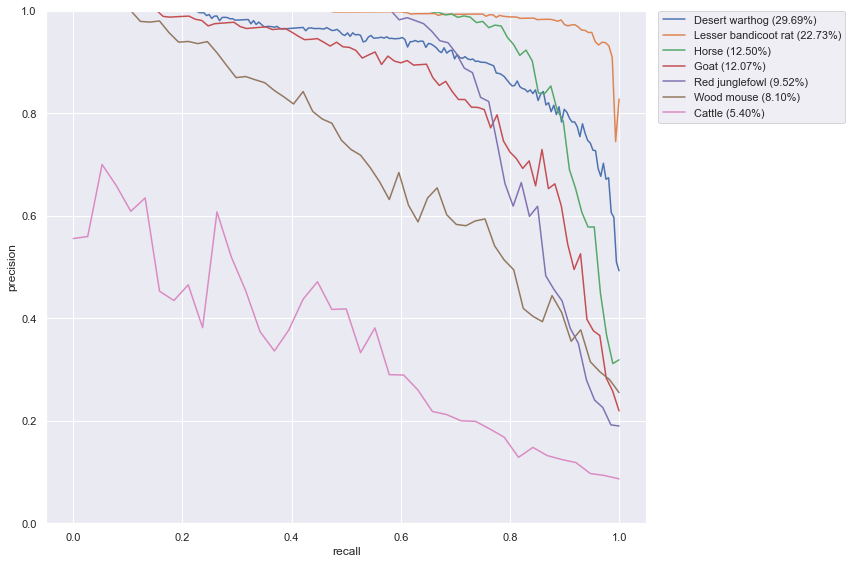

In [62]:
plt.clf()
sns.set_theme()
hue_order = None
if metadata is not None:
    pr_curves_df_metadata = pr_curves_df.replace({"class": metadata})
    hue_order = list(metadata.values())
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=pr_curves_df_metadata, x="recall", y="precision", hue="class", hue_order=hue_order, ci=None)
ax.set_ylim(0, 1)
plt.rcParams['xtick.labelsize'] = 8
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()